# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from cvxpy import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subsection 1

In [2]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    return reds, blues

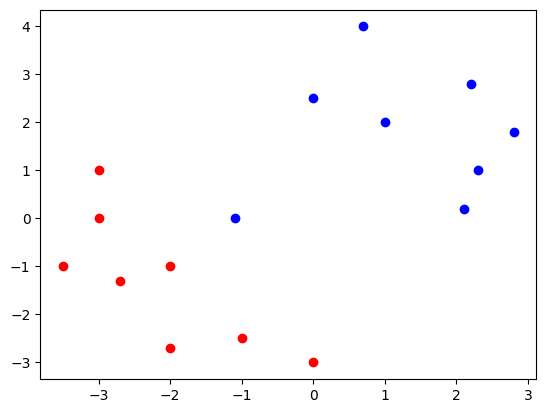

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

reds,blues = plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [4]:
# Write your code here

def svmhardmargin(X,y,blues,reds,C = None):
    d = X.shape[1]
    uni,counts = np.unique(y,return_counts = True)
    m = counts[0]
    n = counts[1]
    weights = cp.Variable((d,1))
    bvar = cp.Variable()
    constraints=[]
    for i in range(n):
        constraints.append(weights.T @ reds[i] + bvar <= -1 )
    for i in range(m):
        constraints.append(weights.T @ blues[i] + bvar >= 1)
    objective = cp.Minimize((1/2)*norm(weights,2))
    prob = Problem(objective, constraints)
    result=prob.solve()
    return weights.value,bvar.value

w,b = svmhardmargin(X,y,blues,reds)
print(w)
print(b)


[[1.73913044]
 [1.30434783]]
2.9130434807856544


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

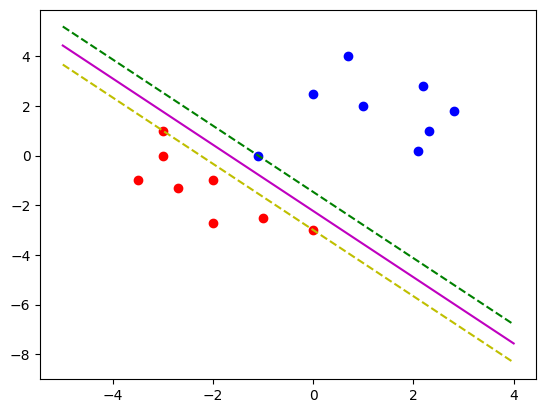

In [5]:
# Write your code here
def visualise_svm(reds,blues,w,b):
    
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    m = (-b - w[0]*blues)/w[1]
    x = np.linspace(-5, 4, 10)
    z0= -b - (w[0]*x)
    plt.plot(x, (z0)/w[1] , 'm')

    plt.plot(x, (z0+1)/w[1] ,'g--')

    plt.plot(x, (z0-1)/w[1] , 'y--')

    plt.show()
visualise_svm(reds,blues,w,b)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

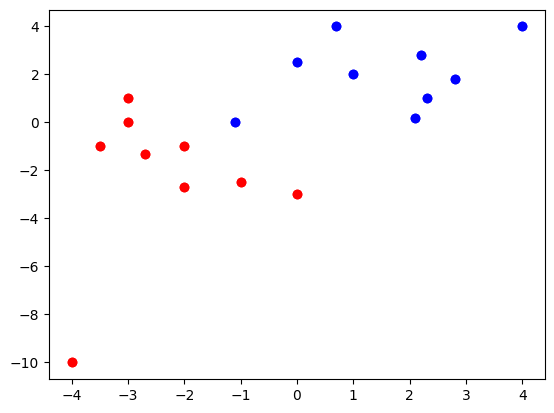

(18, 2) (18,)
(9, 2) (9, 2)


In [6]:
# Re-create the Synthetic Data by adding the points and visualize the points
Xup = np.append(X, [[-4,-10],[4,4]], axis=0)
yup = np.append(y, [1,-1])
redsup, bluesup = plot_points(Xup, yup)
plt.scatter(redsup[:, 0], redsup[:, 1], c = 'r')
plt.scatter(bluesup[:, 0], bluesup[:, 1], c = 'b')
plt.show()
print(Xup.shape,yup.shape)
print(redsup.shape,bluesup.shape)

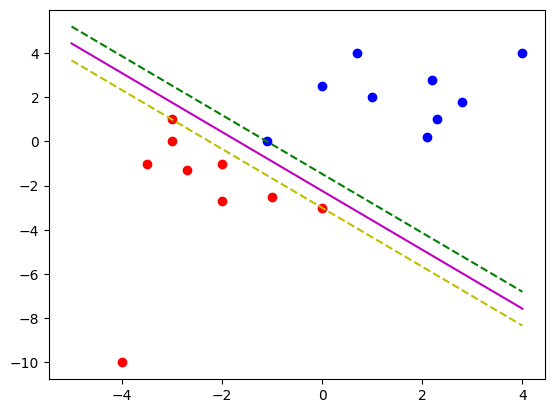

In [7]:
# Solve for the decision boundary using this modified dataset
wup,bup = svmhardmargin(Xup,yup,bluesup,redsup)
visualise_svm(redsup,bluesup,wup,bup)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

for C = 0.01

value of w  [[-0.35199998]
 [-0.38799998]]
value of b  -0.11938557293887768


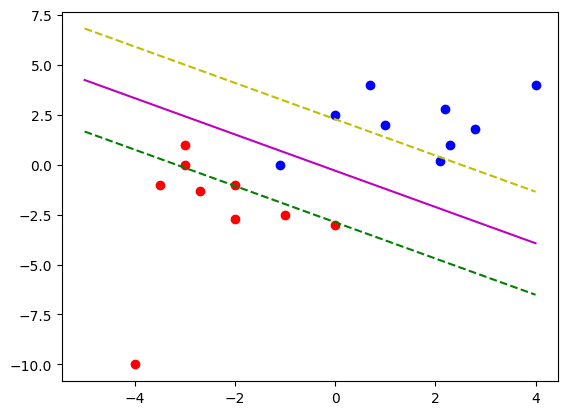

In [8]:
def svmsoft(X,y,blues,reds,C = None):
    if C == None:
        return svmhardmargin(X,y,blues,reds)
    uni,counts = np.unique(y,return_counts = True)
    m = counts[0]
    n = counts[1]
    weights = Variable((X.shape[1],1))
    bvar = Variable()
    eps = Variable(X.shape[0])
    
    constraints =[]
    i=0
    while i <(X.shape[0]):
      constraints.append((y[i]*(weights.T @ X[i] + bvar) -1 + eps[i] ) >= 0)
      i=i+1
    objective_function = Minimize(0.5*square(norm(weights)) +  C*sum(eps))
    prob = Problem(objective_function, constraints)
    prob.solve()   
    return weights.value,bvar.value



w_soft,b_soft = svmsoft(Xup,yup,bluesup,redsup,C = 0.01)
print("for C = {}\n".format(0.01))
print("value of w ",w_soft)
print("value of b ",b_soft)
visualise_svm(redsup,bluesup,w_soft,b_soft)





for C = 0.1

value of w  [[-3.52000232]
 [-3.88000255]]
value of b  -0.47236295069646483


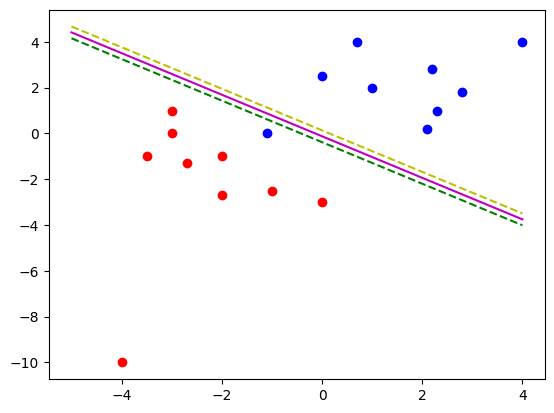

In [9]:
def svmsoft(X,y,blues,reds,C = None):
    if C == None:
        return svmhardmargin(X,y,blues,reds)
    uni,counts = np.unique(y,return_counts = True)
    m = counts[0]
    n = counts[1]
    weights = Variable((X.shape[1],1))
    bvar = Variable()
    eps = Variable(X.shape[0])
    
    constraints =[]
    i=0
    while i <(X.shape[0]):
      constraints.append((y[i]*(weights.T @ X[i] + bvar) -1 + eps[i] ) >= 0)
      i=i+1
    objective_function = Minimize(0.5*square(norm(weights)) +  C*sum(eps))
    prob = Problem(objective_function, constraints)
    prob.solve()   
    return weights.value,bvar.value



w_soft,b_soft = svmsoft(Xup,yup,bluesup,redsup,C = 0.1)
print("for C = {}\n".format(0.1))
print("value of w ",w_soft)
print("value of b ",b_soft)
visualise_svm(redsup,bluesup,w_soft,b_soft)


In [10]:
def svmsoft(X,y,blues,reds,C = None):
    if C == None:
        return svmhardmargin(X,y,blues,reds)
    uni,counts = np.unique(y,return_counts = True)
    m = counts[0]
    n = counts[1]
    weights = Variable((X.shape[1],1))
    bvar = Variable()
    eps = Variable(X.shape[0])
    
    constraints =[]
    i=0
    while i <(X.shape[0]):
      constraints.append((y[i]*(weights.T @ X[i] + bvar) -1 + eps[i] ) >= 0)
      i=i+1
    objective_function = Minimize(0.5*square(norm(weights)) +  C*sum(eps))
    prob = Problem(objective_function, constraints)
    prob.solve()   
    return weights.value,bvar.value



w_soft,b_soft = svmsoft(Xup,yup,bluesup,redsup,C = 3)
print("for C = {}\n".format(3))
print("value of w ",w_soft)
print("value of b ",b_soft)
visualise_svm(redsup,bluesup,w_soft,b_soft)


for C = 3

value of w  [[-105.60083238]
 [-116.4009175 ]]
value of b  -11.846289040288369


In [11]:
def svmsoft(X,y,blues,reds,C = None):
    if C == None:
        return svmhardmargin(X,y,blues,reds)
    uni,counts = np.unique(y,return_counts = True)
    m = counts[0]
    n = counts[1]
    weights = Variable((X.shape[1],1))
    bvar = Variable()
    eps = Variable(X.shape[0])
    
    constraints =[]
    i=0
    while i <(X.shape[0]):
      constraints.append((y[i]*(weights.T @ X[i] + bvar) -1 + eps[i] ) >= 0)
      i=i+1
    objective_function = Minimize(0.5*square(norm(weights)) +  C*sum(eps))
    prob = Problem(objective_function, constraints)
    prob.solve()   
    return weights.value,bvar.value



w_soft,b_soft = svmsoft(Xup,yup,bluesup,redsup,C = 10)
print("for C = {}\n".format(10))
print("value of w ",w_soft)
print("value of b ",b_soft)
visualise_svm(redsup,bluesup,w_soft,b_soft)


/usr/local/lib/python3.9/dist-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


for C = 10

value of w  [[-352.8999489 ]
 [-388.99199202]]
value of b  -39.40255812912603


[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -1.1   0. ]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [ -4.  -10. ]
 [  4.    4. ]]
:::::::::::::::::::
[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]
:::::::::::::::::::
[[-1.1  0. ]
 [ 0.   2.5]
 [ 1.   2. ]
 [ 0.7  4. ]
 [ 2.1  0.2]
 [ 2.3  1. ]
 [ 2.8  1.8]
 [ 2.2  2.8]
 [ 4.   4. ]]
:::::::::::::::::::
[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -4.  -10. ]]
:::::::::::::::::::
for C = 100

value of w  [[-3519.99989411]
 [-3879.99989262]]
value of b  -118.87685523999811


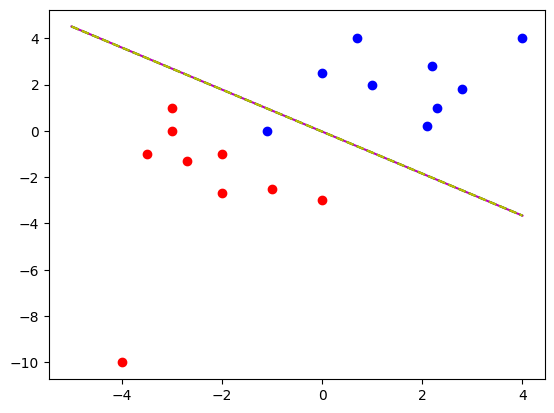

In [12]:
def svmsoft(X,y,blues,reds,C = None):
    if C == None:
        return svmhardmargin(X,y,blues,reds)
    print(X)
    print(":::::::::::::::::::")
    print(y)
    print(":::::::::::::::::::")
    print(blues)
    print(":::::::::::::::::::")
    print(reds)
    print(":::::::::::::::::::")
    uni,counts = np.unique(y,return_counts = True)
    m = counts[0]
    n = counts[1]
    weights = Variable((X.shape[1],1))
    bvar = Variable()
    eps = Variable(X.shape[0])
    
    constraints =[]
    i=0
    while i <(X.shape[0]):
      constraints.append((y[i]*(weights.T @ X[i] + bvar) -1 + eps[i] ) >= 0)
      i=i+1
    objective_function = Minimize(0.5*square(norm(weights)) +  C*sum(eps))
    prob = Problem(objective_function, constraints)
    prob.solve(solver=SCS)   
    return weights.value,bvar.value



w_soft,b_soft = svmsoft(Xup,yup,bluesup,redsup,C =100)
print("for C = {}\n".format(100))
print("value of w ",w_soft)
print("value of b ",b_soft)
visualise_svm(redsup,bluesup,w_soft,b_soft)


Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

In [14]:
# Write your Code here
def visualise_svm(reds,blues,w,b):
    
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    m = (-b - w[0]*blues)/w[1]
    x = np.linspace(-5, 4, 10)
    z0= -b - (w[0]*x)
    plt.plot(x, (z0)/w[1] , 'm')

    plt.plot(x, (z0+1)/w[1] ,'g--')

    plt.plot(x, (z0-1)/w[1] , 'y--')

    plt.show()

def svmsoft(X,y,blues,reds,C ):
    # if C == None:
    #     return svmhardmargin(X,y,blues,reds)
    uni,counts = np.unique(y,return_counts = True)
    m = counts[0]
    n = counts[1]
    weights = Variable((X.shape[1],1))
    bvar = Variable()
    eps = Variable(X.shape[0])
    
    constraints =[]
    i=0
    while i <(X.shape[0]):
      constraints.append((y[i]*(weights.T @ X[i] + bvar) -1 + eps[i] ) >= 0)
      i=i+1
    print(len(constraints))
   
    objective_function = Minimize(0.5*square(norm(weights)) +  C*sum(eps))
    prob = Problem(objective_function, constraints)
    prob.solve()   
    print(prob.status)
    print(weights.value,bvar.value)
    return weights.value,bvar.value
sv_red = []
sv_blue = []
sv2 = []
for x in X:
    t = (np.dot(w.T,x) + b)
    if(t[0].round(3) == -1.0):
        sv_red.append(x)
    if t[0].round(3) == 1.0:
        sv_blue.append(x)
sv2 = sv_red+sv_blue
print(sv_blue)
print(sv_red)
Xdel = Xup
ydel=yup
blues_del=bluesup
reds_del=redsup
print("*&*&")
for pt in sv_red:
    idx = np.where((Xdel == pt).all(axis=1))[0]
    Xdel = np.delete(Xdel, idx,0)
    ydel = np.delete(ydel, idx,0)
    idxpt = np.where((np.array(reds_del) == pt).all(axis=1))[0][0]
    reds_del = np.delete(reds_del, idxpt, 0)
print("------------------##$%^&$#%%*%$%$7^%$$&^4------------------")
for pt in sv_blue:
    idx = np.where((Xdel == pt).all(axis=1))[0]
    Xdel = np.delete(Xdel, idx,0)
    ydel = np.delete(ydel, idx,0)
    idxpt = np.where((np.array(blues_del) == pt).all(axis=1))[0][0]
    blues_del = np.delete(blues_del, idxpt, 0)
    
    

print(type(Xdel),type(blues_del),type(reds_del))
Xdel=[]
ydel=[]
for i in range(len(blues_del)):
  Xdel.append(blues_del[i])
  ydel.append(1)
for i in range(len(reds_del)):
  Xdel.append(reds_del[i])
  ydel.append(-1)
Xdel=np.array(Xdel)
ydel=np.array(ydel)


print(Xdel)
print(ydel.shape)
print(ydel)
print(":::")
print(blues_del)
print("---")
print(reds_del)

w_soft,b_soft = svmsoft(Xdel,ydel,blues_del,reds_del,C = 10)
print("for C = 100:::")
print("value of w ",w_soft)
print("value of b ",b_soft)
visualise_svm(reds_del,blues_del,w_soft,b_soft)

[array([-1.1,  0. ])]
[array([-3.,  1.]), array([ 0., -3.])]
*&*&
------------------##$%^&$#%%*%$%$7^%$$&^4------------------
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [  4.    4. ]
 [ -3.5  -1. ]
 [ -3.    0. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [ -4.  -10. ]]
(15,)
[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
:::
[[0.  2.5]
 [1.  2. ]
 [0.7 4. ]
 [2.1 0.2]
 [2.3 1. ]
 [2.8 1.8]
 [2.2 2.8]
 [4.  4. ]]
---
[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [ -4.  -10. ]]
15
unbounded
None None
for C = 100:::
value of w  None
value of b  None


### Subsection 2

In [15]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-29 17:22:02--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-03-29 17:22:02 (97.9 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-29 17:22:02--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
L

In [16]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix


In [17]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [18]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [19]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [21]:

train_mask = np.isin(y_train, [0,1,2])
test_mask = np.isin(y_test, [0,1,2])
images_train, labels_train = X_train[train_mask], y_train[train_mask]
images_test, labels_test = X_test[test_mask], y_test[test_mask]


In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

l= [0.001, 0.01, 0.1, 1 ,2, 5,10, 20]
res=[]
for i in l:
    clf = SVC(C = i, kernel = 'linear')
    clf.fit(images_train, labels_train)
    predicted = clf.predict(images_test)
    mat=confusion_matrix(labels_test, predicted)
    res.append({
        "value_of_c":i,
        "accuracy":metrics.accuracy_score(labels_test, predicted),
        "confusion_matrix":confusion_matrix(labels_test, predicted),
        'f1 score':f1_score( labels_test, predicted, average='weighted'),
        'precision':precision_score( labels_test, predicted, average='weighted'),
        'recall':recall_score( labels_test, predicted, average='weighted')
        
    })
    
df= pd.DataFrame(res)
print(df)

   value_of_c  accuracy                         confusion_matrix  f1 score  \
0       0.001  0.981152  [[292, 0, 5], [1, 343, 2], [6, 4, 302]]  0.981135   
1       0.010  0.981152  [[292, 0, 5], [1, 343, 2], [6, 4, 302]]  0.981135   
2       0.100  0.981152  [[292, 0, 5], [1, 343, 2], [6, 4, 302]]  0.981135   
3       1.000  0.981152  [[292, 0, 5], [1, 343, 2], [6, 4, 302]]  0.981135   
4       2.000  0.981152  [[292, 0, 5], [1, 343, 2], [6, 4, 302]]  0.981135   
5       5.000  0.981152  [[292, 0, 5], [1, 343, 2], [6, 4, 302]]  0.981135   
6      10.000  0.981152  [[292, 0, 5], [1, 343, 2], [6, 4, 302]]  0.981135   
7      20.000  0.981152  [[292, 0, 5], [1, 343, 2], [6, 4, 302]]  0.981135   

   precision    recall  
0   0.981142  0.981152  
1   0.981142  0.981152  
2   0.981142  0.981152  
3   0.981142  0.981152  
4   0.981142  0.981152  
5   0.981142  0.981152  
6   0.981142  0.981152  
7   0.981142  0.981152  


In [23]:
ker= ['poly','rbf','sigmoid']
res=[]

for i in ker:
    if(i=='poly'):
      clf = SVC( degree = 3,kernel = i)
    else:
      clf = SVC( kernel = i)
    clf.fit(images_train, labels_train)
    predicted = clf.predict(images_test)
    res.append({
        "kernel": i,
        "accuracy":metrics.accuracy_score(labels_test, predicted),
        "confusion_matrix":confusion_matrix(labels_test, predicted),
        'f1 score':f1_score( labels_test, predicted, average='weighted'),
        'precision':precision_score( labels_test, predicted, average='weighted'),
        'recall':recall_score( labels_test, predicted, average='weighted')


    })

df= pd.DataFrame(res)
print(df)

    kernel  accuracy                          confusion_matrix  f1 score  \
0     poly  0.973822  [[288, 6, 3], [0, 343, 3], [0, 13, 299]]  0.973897   
1      rbf  0.990576   [[296, 0, 1], [0, 341, 5], [2, 1, 309]]  0.990583   
2  sigmoid  0.970681  [[290, 0, 7], [1, 342, 3], [15, 2, 295]]  0.970691   

   precision    recall  
0   0.974557  0.973822  
1   0.990631  0.990576  
2   0.970921  0.970681  
